In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.python.keras import utils
import cv2
from sklearn.preprocessing import LabelEncoder
import imageio #to read image
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
from PIL import Image #For Image resizing
import re

In [3]:
train=pd.read_csv('C:/Users/HP/Desktop/actor_age/agedetectiontrain/train.csv')
test=pd.read_csv('C:\\Users\\HP\\Desktop\\actor_age\\agedetectiontest\\test.csv')
print(train.index)
print(train.ID[0])

RangeIndex(start=0, stop=19906, step=1)
377.jpg


15715
22290.jpg
Age group MIDDLE


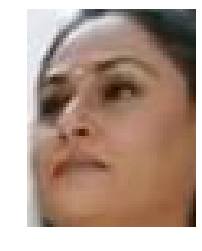

In [4]:
np.random.seed(20)
idx=np.random.choice(train.index)
print(idx)
img_name=train.ID[idx]
print(img_name)
img=imageio.imread(os.path.join('C:/Users/HP/Desktop/actor_age/agedetectiontrain/Train',img_name))
print('Age group', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
temp=[]
for img_name in train.ID:
    img_path=os.path.join('C:/Users/HP/Desktop/actor_age/agedetectiontrain/Train',img_name)
    img=imageio.imread(img_path)
    img=np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
train_x=np.stack(temp)


In [6]:
temp=[]
for img_name in test.ID:
    img_path=os.path.join('C:/Users/HP/Desktop/actor_age/agedetectiontest/Test',img_name)
    img=imageio.imread(img_path)
    img=np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
print(temp)
test_x=np.stack(temp)
print(test_x)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
train_x=train_x/255.
test_x=test_x/255.

In [8]:
lb=LabelEncoder()
train_y=lb.fit_transform(train.Class)
train_y=utils.np_utils.to_categorical(train_y)

In [9]:
input_num_units=(32,32,3)
hidden_num_units=500
output_num_units=3
epochs=5
batch_size=128

In [10]:
model=Sequential([
    InputLayer(input_shape=input_num_units),
    Flatten(),
    Dense(units=hidden_num_units, activation='relu'),
    Dense(units=output_num_units, activation='softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd',loss='categorical_crossentropy' ,metrics=['accuracy'])

In [13]:
model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
19906/19906 [==============================] - 7s 368us/step - loss: 0.9052 - acc: 0.5667
Epoch 2/5
19906/19906 [==============================] - 5s 241us/step - loss: 0.8505 - acc: 0.5988
Epoch 3/5
19906/19906 [==============================] - 5s 245us/step - loss: 0.8258 - acc: 0.6138
Epoch 4/5
19906/19906 [==============================] - 5s 241us/step - loss: 0.8167 - acc: 0.6207
Epoch 5/5
19906/19906 [==============================] - 5s 240us/step - loss: 0.8071 - acc: 0.6272


In [14]:
model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 4s 257us/step - loss: 0.8048 - acc: 0.6291 - val_loss: 0.8317 - val_acc: 0.6102
Epoch 2/5
15924/15924 [==============================] - 4s 250us/step - loss: 0.7967 - acc: 0.6334 - val_loss: 0.8178 - val_acc: 0.6143
Epoch 3/5
15924/15924 [==============================] - 4s 256us/step - loss: 0.7970 - acc: 0.6331 - val_loss: 0.8504 - val_acc: 0.5967
Epoch 4/5
15924/15924 [==============================] - 4s 264us/step - loss: 0.7854 - acc: 0.6435 - val_loss: 0.7821 - val_acc: 0.6404
Epoch 5/5
15924/15924 [==============================] - 4s 254us/step - loss: 0.7876 - acc: 0.6380 - val_loss: 0.7729 - val_acc: 0.6532


In [22]:
pred=model.predict_classes(test_x)
print(pred)
pred=lb.inverse_transform(pred)
print(pred)
test['Class']=pred
test.to_csv('C:/Users/HP/Desktop/actor_age/agedetectiontest/out.csv', index=False)

[0 2 0 ... 0 0 0]
['MIDDLE' 'YOUNG' 'MIDDLE' ... 'MIDDLE' 'MIDDLE' 'MIDDLE']


[0 2 0 ... 0 2 0]
['MIDDLE' 'YOUNG' 'MIDDLE' ... 'MIDDLE' 'YOUNG' 'MIDDLE']
MIDDLE
Original MIDDLE predicted MIDDLE


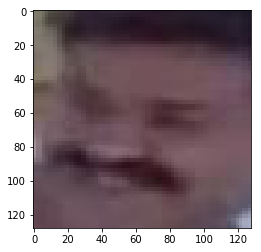

In [54]:
idx=2347
img_name=train.ID[idx]
img=imageio.imread(os.path.join('C:/Users/HP/Desktop/actor_age/agedetectiontrain/Train',img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128,128))))
pred=model.predict_classes(train_x)
print(pred)
p=lb.inverse_transform(pred)
print(p)
print(test.Class[2])
print('Original',train.Class[idx],'predicted',p[idx])




In [58]:
def models_with_different_optimizers(list_of_optimizers):    
    
    for i in range(len(list_of_optimizers)):        
        model.compile(loss='categorical_crossentropy',
                  optimizer=list_of_optimizers[i], # Learning rate and momentum can be passed inside optimizer
                  metrics=['accuracy'])
        # Traning the model and writing log files for TensorBoard in distinct directories        
        val = re.search('optimizers\..*\so', str(list_of_optimizers[i])).group(0)[11:][:-2] # Fetching optimizer name
        logdir = r'optims\\' + val # Each log file needs to be written in a distinct directory. (Mandatory)
        
        # Writing graph will take time. Hence, keeping it False.
        cb = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=False)         
        print('Building model using '+ val + ' optimizer')
        history = model.fit(train_x, train_y, epochs=epochs, 
                           validation_split=0.2,
                           callbacks=[cb])
        print('Model built sucessfully.')
        print('')
# Listing the optimizers
optims = [keras.optimizers.Adam(), keras.optimizers.Adadelta(), 
          keras.optimizers.Adagrad(), keras.optimizers.RMSprop(), 
          keras.optimizers.SGD()]
# Calling the function
models_with_different_optimizers(optims)


Building model using Adam optimizer
Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 22s 1ms/step - loss: 0.9311 - acc: 0.5891 - val_loss: 0.8126 - val_acc: 0.6286
Epoch 2/5
15924/15924 [==============================] - 22s 1ms/step - loss: 0.8264 - acc: 0.6184 - val_loss: 0.9060 - val_acc: 0.6092
Epoch 3/5
15924/15924 [==============================] - 23s 1ms/step - loss: 0.8084 - acc: 0.6309 - val_loss: 0.7788 - val_acc: 0.6487
Epoch 4/5
15924/15924 [==============================] - 23s 1ms/step - loss: 0.7908 - acc: 0.6392 - val_loss: 0.7780 - val_acc: 0.6522
Epoch 5/5
15924/15924 [==============================] - 24s 1ms/step - loss: 0.7859 - acc: 0.6469 - val_loss: 0.7716 - val_acc: 0.6497
Model built sucessfully.

Building model using Adadelta optimizer
Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 25s 2ms/step - loss: 0.7892 - acc: 0.6373 - val_loss: 1.0225 - 